1. Regression Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset overview
heart_disease = pd.read_csv("C:/GitHub/BINF-5507-Assignments/Assignment-2/Data/heart_disease_uci_dataset.csv")
heart_disease.head()
heart_disease.describe()
heart_disease.info()
print(heart_disease.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
(920, 15)


EDA

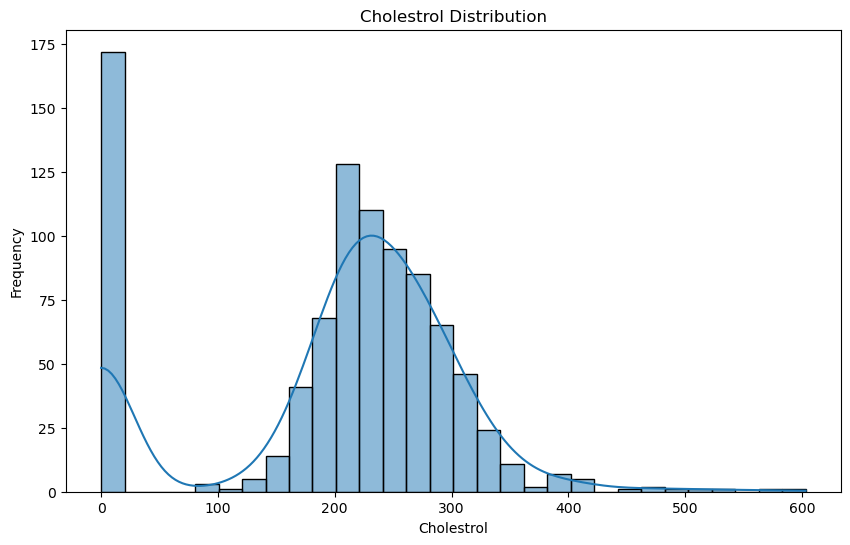

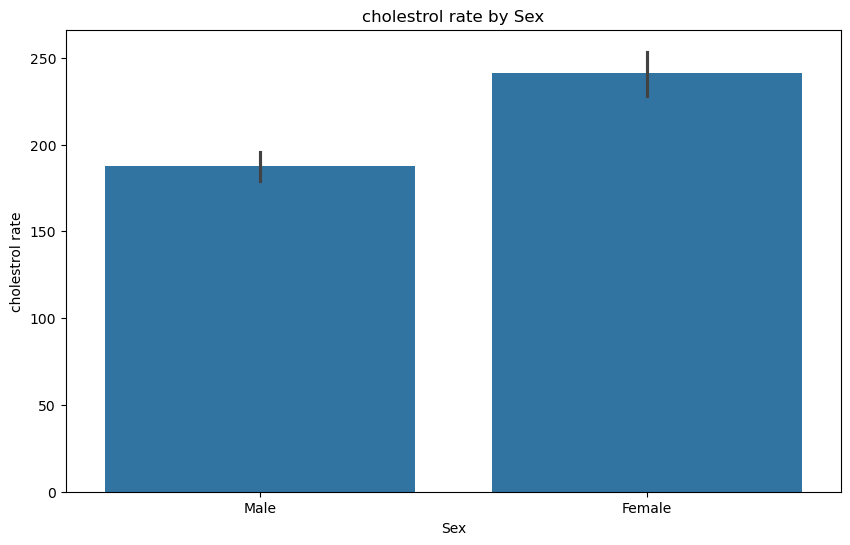

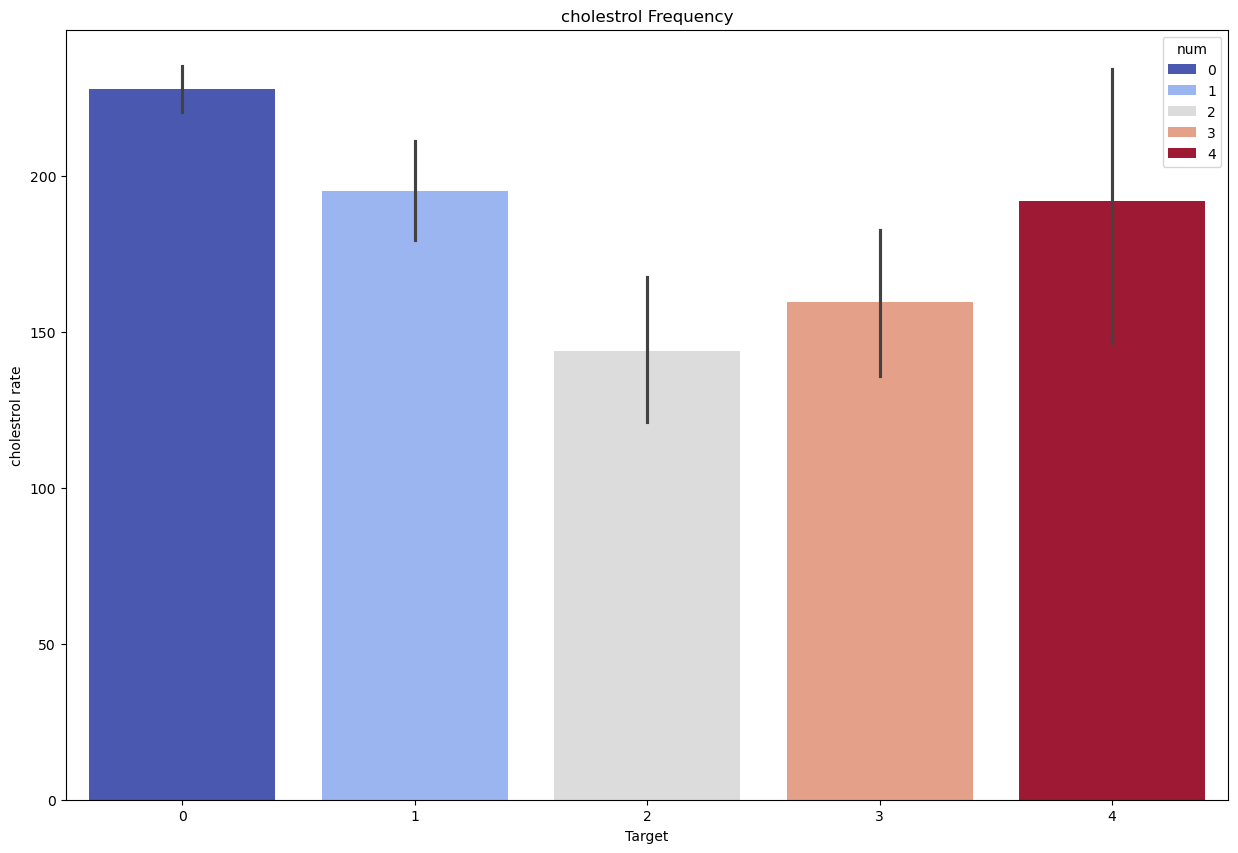

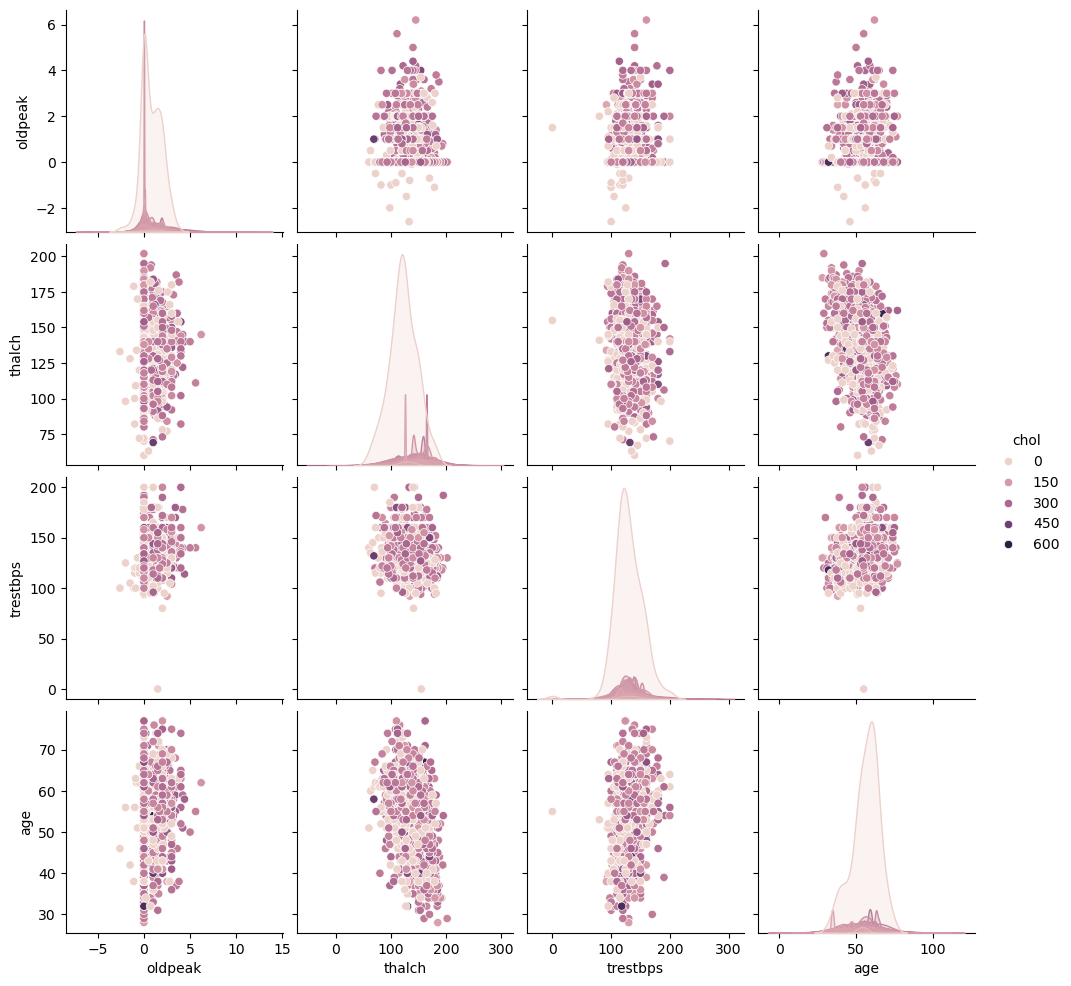

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Histogram of cholestrol
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease['chol'], bins=30, kde=True)
plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

# Plot of cholestrol column grouped by num column 
fig = px.histogram(data_frame=heart_disease, x='chol', color='num')
fig.show()


# Bar plot of cholestrol distribution by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='chol', data=heart_disease)
plt.title('cholestrol rate by Sex')
plt.xlabel('Sex')
plt.ylabel('cholestrol rate')
plt.show()

# Bar plot of cholestrol frequency
plt.figure(figsize=(15, 10))
sns.barplot(x='num', y='chol', data=heart_disease, hue='num', palette='coolwarm')
plt.title('cholestrol Frequency')
plt.xlabel('Target')
plt.ylabel('cholestrol rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(heart_disease[['oldpeak', 'thalch', 'chol', 'trestbps', 'age']], hue='chol')
plt.show()


Data Cleaning

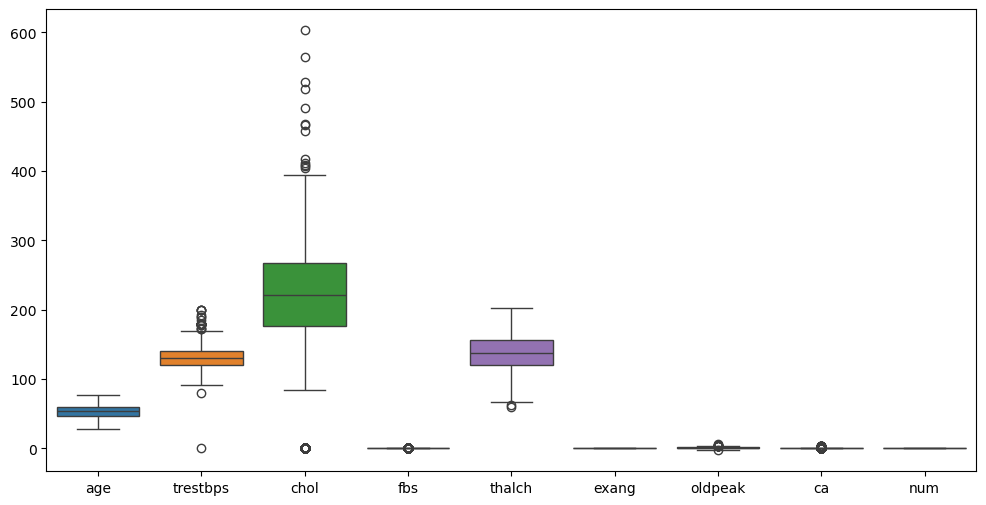

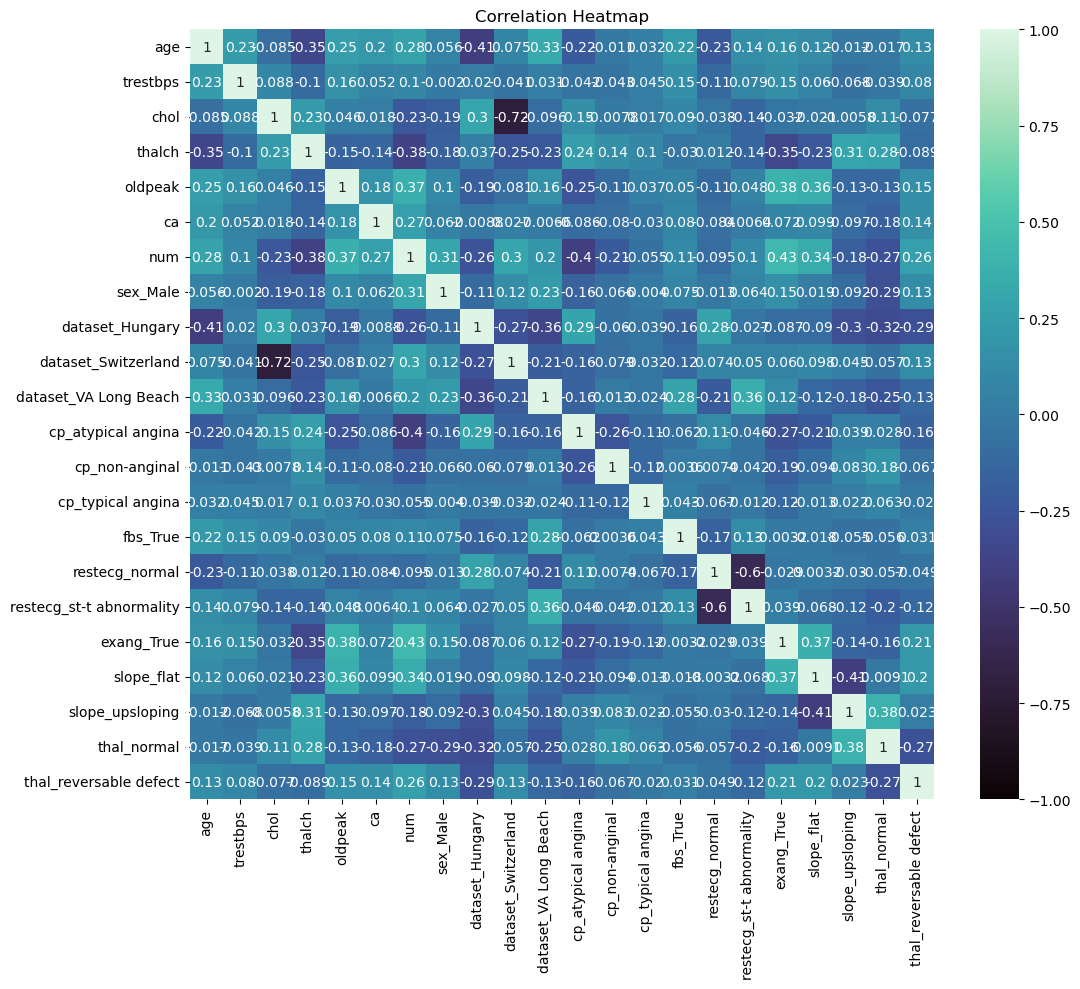

In [12]:
import plotly.express as px


clean_data = heart_disease.copy()

# According to dataset description in 'num' column, Value 0 means 50% diameter narrowing and Value =>1 means 50% diameter narrowing
# convert num column to 1 and 0
clean_data['num'] = (clean_data['num'] > 0).astype(int)

# Remove duplicates
clean_data = clean_data.drop_duplicates()

# Check for missing values
na_count = clean_data.isna().sum()

# Impute missing values 
# for numerical data
num_cols = clean_data.select_dtypes(include='number').columns.tolist()
clean_data[num_cols] = clean_data[num_cols].fillna(clean_data[num_cols].mean())

# for categorical data
cat_cols = clean_data.select_dtypes(include=['object']).columns.tolist()
clean_data[cat_cols] = clean_data[cat_cols].fillna(clean_data[cat_cols].mode())


# Check for missing values again
na_count2 = clean_data.isna().sum()

# Check for Outliers
Q1 = clean_data[num_cols].quantile(0.25)
Q3 = clean_data[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((clean_data[num_cols] < (Q1 - 1.5 * IQR)) | (clean_data[num_cols] > (Q3 + 1.5 * IQR))).sum()

# PLot the boxplot to check the outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=clean_data)  

# Convert categorical columns
clean_data = pd.get_dummies(clean_data, columns=cat_cols, drop_first=True)
clean_data.head()

# check for correlation to avoid overfitting
corr = clean_data.corr()
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()


Linear Regression Model

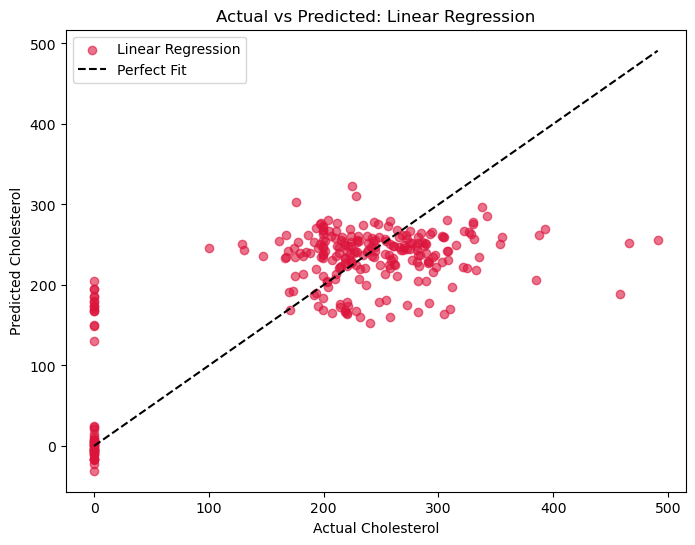

Coefficient: [  5.12804148   4.74364332   1.91417466  -3.83730735   1.39711099
   5.24027072  -7.92140524   0.62429656 -85.71572175 -31.71812734
  -3.07260461  -6.93179477  -3.54891601   8.14773998  -5.32197091
  -6.75652625   1.16940854   0.98954448  -3.00582944  -3.95063696
  -6.63468216]
Root Mean Squared Error: 69.61357904105074
R^2 Score: 0.5733509826036227


c:\Users\elfak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+06, tolerance: 7.771e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\elfak\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\elfak\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users

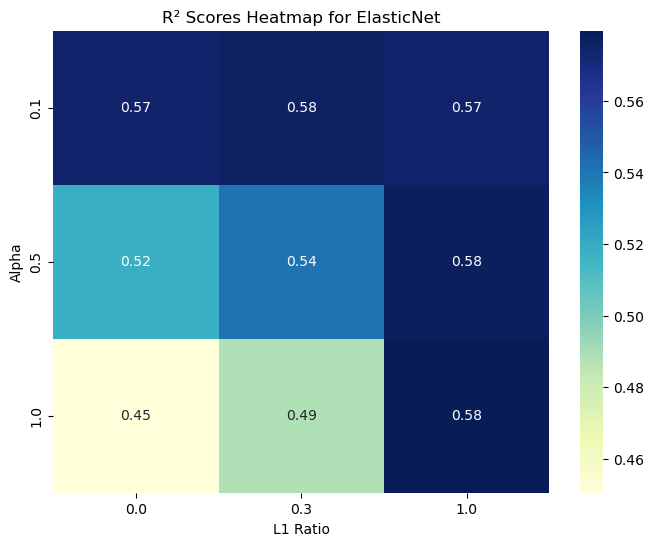

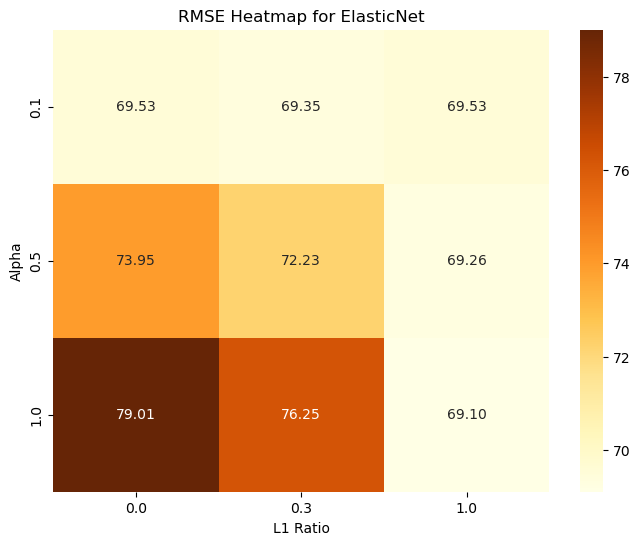

Best ElasticNet config — Alpha: 1.0, L1 Ratio: 69.10


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error


np.random.seed(42)
X = clean_data.drop("chol",axis=1)
y = clean_data["chol"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin = lin_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color='crimson', alpha=0.6, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual Cholesterol")
plt.ylabel("Predicted Cholesterol")
plt.title("Actual vs Predicted: Linear Regression")
plt.legend()
plt.show()

# Evaluate the model
coefficient_lin = lin_reg.coef_
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Coefficient: {coefficient_lin}")
print(f"Root Mean Squared Error: {rmse_lin}")
print(f"R^2 Score: {r2_lin}")

# ElasticNet
alpha_values = [0.1, 0.5, 1.0]
l1_ratio_values = [0.0, 0.3, 1.0]
results = []

for alpha in alpha_values:
    for l1 in l1_ratio_values:
        model_1 = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=42)
        model_1.fit(X_train, y_train)
        y_pred_en = model_1.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred_en, squared=False)
        r2 = r2_score(y_test, y_pred_en)
        results.append({'alpha': alpha, 'l1_ratio': l1, 'RMSE': rmse, 'R2': r2})

results_df = pd.DataFrame(results)

# Heatmap of R2
pivot_r2 = results_df.pivot(index="alpha", columns="l1_ratio", values="R2")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_r2, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("R² Scores Heatmap for ElasticNet")
plt.ylabel("Alpha")
plt.xlabel("L1 Ratio")
plt.show()

# Heatmap of RMSE
pivot_rmse = results_df.pivot(index="alpha", columns="l1_ratio", values="RMSE")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_rmse, annot=True, cmap="YlOrBr", fmt=".2f", cbar=True)
plt.title("RMSE Heatmap for ElasticNet")
plt.ylabel("Alpha")
plt.xlabel("L1 Ratio")
plt.show()

# Best configuration
best_row = results_df.loc[results_df['R2'].idxmax()]
print(f"Best ElasticNet config — Alpha: {best_row['alpha']}, L1 Ratio: {best_row['RMSE']:.2f}")


2. Classification Models


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

np.random.seed(42)
X = clean_data.drop("num",axis=1)
y = clean_data["num"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logestic Regresssion Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, auc, precision_recall_curve
import pandas as pd

penalty_values = ['l1', 'l2', 'elasticnet']
solver_values = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

valid_combinations = []

# Find valid combinations
for penalty in penalty_values:
    for solver in solver_values:
        try:
            model_2 = LogisticRegression(
                penalty=penalty,
                solver=solver,
                l1_ratio=0.5 if penalty == 'elasticnet' else None,
                max_iter=100
            )
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                model_2.fit(X_train[:5], y_train[:5])
            valid_combinations.append((penalty, solver))
        except:
            continue

# Evaluate only valid combinations
results_logreg = []

for penalty, solver in valid_combinations:
    model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        l1_ratio=0.5 if penalty == 'elasticnet' else None,
    )
    model_2.fit(X_train, y_train)
    y_pred = model_2.predict(X_test)
    y_proba = model_2.predict_proba(X_test)[:, 1]

    results_logreg.append({
        'penalty': penalty,
        'solver': solver,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auroc': roc_auc_score(y_test, y_proba),
        'auprc': average_precision_score(y_test, y_proba),
        'coef': model_2.coef_.tolist()
    })
best_row = results_df.loc[results_df['auroc'].idxmax()]

# Print results
results_df = pd.DataFrame(results_logreg)
print("Valid penalty-solver combinations evaluated:")
print(pd.DataFrame(valid_combinations, columns=['penalty', 'solver']))
print("\n Logistic Regression Performance (sorted by AUROC):")
print(results_df.sort_values(by='auroc', ascending=False))
print("The best combination is:")
print(f"Penalty: {best_row['penalty']}, Solver: {best_row['solver']}")
print(f"AUROC: {best_row['auroc']:.2f}, AUPRC: {best_row['auprc']:.2f}")


Valid penalty-solver combinations evaluated:
      penalty           solver
0          l1        liblinear
1          l1             saga
2          l2            lbfgs
3          l2        liblinear
4          l2        newton-cg
5          l2  newton-cholesky
6          l2              sag
7          l2             saga
8  elasticnet             saga

 Logistic Regression Performance (sorted by AUROC):
      penalty           solver  accuracy        f1     auroc     auprc  \
4          l2        newton-cg   0.82971  0.850794  0.894128  0.893409   
0          l1        liblinear   0.82971  0.850794  0.894075  0.893370   
1          l1             saga   0.82971  0.850794  0.894075  0.893370   
2          l2            lbfgs   0.82971  0.850794  0.894075  0.893370   
3          l2        liblinear   0.82971  0.850794  0.894075  0.893370   
5          l2  newton-cholesky   0.82971  0.850794  0.894075  0.893370   
6          l2              sag   0.82971  0.850794  0.894075  0.893370   


KNN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

score = []
for k in range(1,10):
    model_3=KNeighborsClassifier(n_neighbors=k)
    model_3.fit(X_train, y_train)
    y_pred=model_3.predict(X_test)
    y_scores_knn = model_3.predict_proba(X_test)[:,1]
    score.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auroc': roc_auc_score(y_test, y_scores_knn),
        'auprc': average_precision_score(y_test, y_scores_knn),
    })
for entry in score:
    print(f"k = {entry['k']} — Accuracy: {entry['accuracy']:.2f}, "
          f"F1 Score: {entry['f1']:.2f}, AUROC: {entry['auroc']:.2f}, AUPRC: {entry['auprc']:.2f}")


k = 1 — Accuracy: 0.75, F1 Score: 0.77, AUROC: 0.74, AUPRC: 0.74
k = 2 — Accuracy: 0.74, F1 Score: 0.74, AUROC: 0.82, AUPRC: 0.80
k = 3 — Accuracy: 0.80, F1 Score: 0.82, AUROC: 0.84, AUPRC: 0.81
k = 4 — Accuracy: 0.80, F1 Score: 0.82, AUROC: 0.86, AUPRC: 0.84
k = 5 — Accuracy: 0.81, F1 Score: 0.83, AUROC: 0.87, AUPRC: 0.85
k = 6 — Accuracy: 0.82, F1 Score: 0.84, AUROC: 0.88, AUPRC: 0.86
k = 7 — Accuracy: 0.80, F1 Score: 0.83, AUROC: 0.88, AUPRC: 0.87
k = 8 — Accuracy: 0.83, F1 Score: 0.85, AUROC: 0.90, AUPRC: 0.88
k = 9 — Accuracy: 0.83, F1 Score: 0.85, AUROC: 0.90, AUPRC: 0.88


Plot AUROC and AUPRC curves for the model’s best configuration

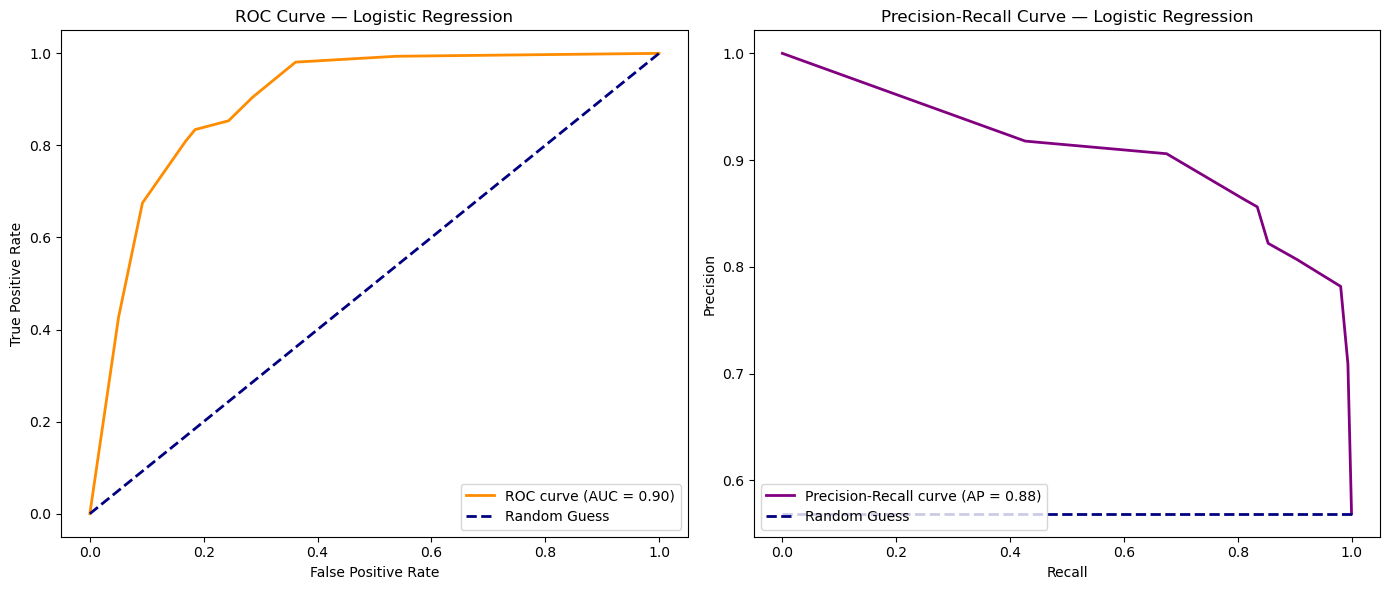

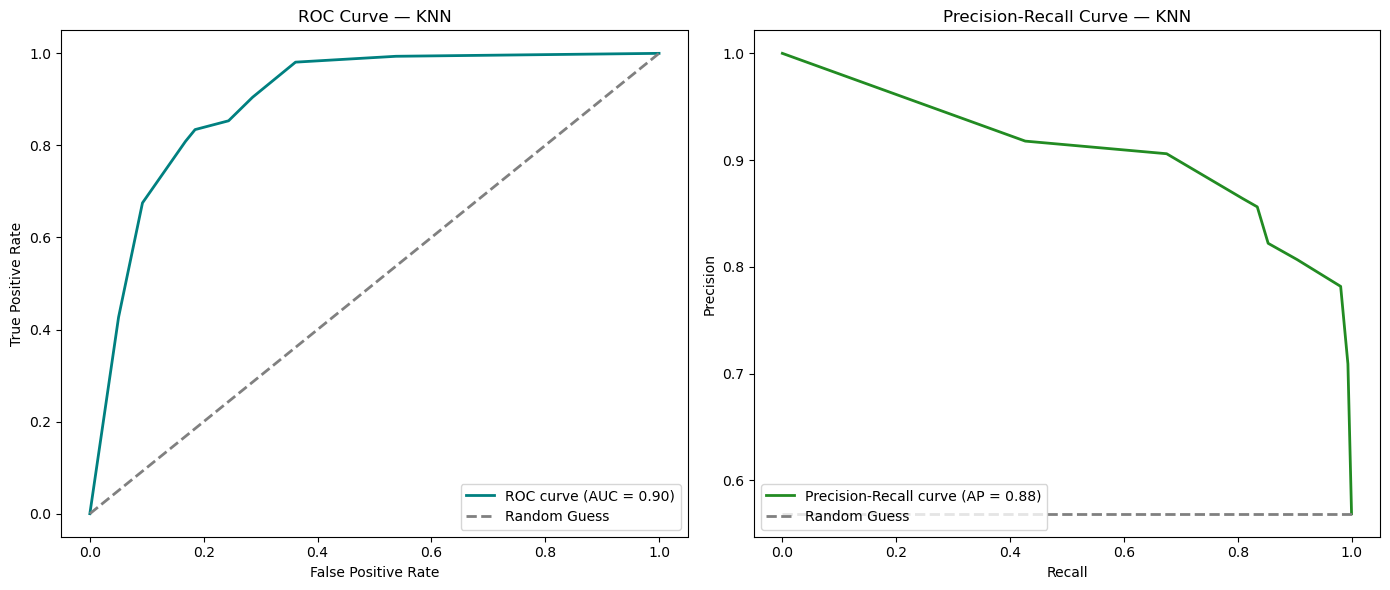

Logistic Regression
 Cross-Validation Accuracy: 0.832
 Test Accuracy: 0.830

KNN
 Cross-Validation Accuracy: 0.843
 Test Accuracy: 0.826

Linear Regression
 Cross-Validation R²: 0.477
 Test R²: 0.465, RMSE: 0.36

ElasticNet
 Cross-Validation R²: -0.020
 Test R²: -0.002, RMSE: 0.50

Best Model Selected:
Pipeline(steps=[('model', LogisticRegression(solver='liblinear'))])


c:\Users\elfak\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\elfak\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Train best KNN model
best_k = 8
model_best = KNeighborsClassifier(n_neighbors=best_k)
model_best.fit(X_train, y_train)
y_scores = model_best.predict_proba(X_test)[:, 1]

knn_model_best = KNeighborsClassifier(n_neighbors=8)
knn_model_best.fit(X_train, y_train)
y_scores = knn_model_best.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores) 
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve — Logistic Regression')
axes[0].legend(loc='lower right')

axes[1].plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
axes[1].plot([0, 1], [y_test.mean(), y_test.mean()], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve — Logistic Regression')
axes[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

# Get predicted probabilities from best KNN model
y_scores_knn = knn_model_best.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(fpr, tpr, color='teal', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve — KNN')
axes[0].legend(loc='lower right')

axes[1].plot(recall, precision, color='forestgreen', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
axes[1].plot([0, 1], [y_test.mean(), y_test.mean()], color='gray', lw=2, linestyle='--', label='Random Guess')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve — KNN')
axes[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

# To evaluate models because they gave similar plots
from sklearn.linear_model import LogisticRegression, ElasticNet, LinearRegression
from sklearn.base import is_classifier

penalty = best_row['penalty']
if penalty == "12":
    penalty = "l2"  # Fix the typo
models = [
    ('Logistic Regression', LogisticRegression(penalty=penalty, solver=best_row['solver'], l1_ratio=0.5 if penalty == 'elasticnet' else None,)),
    ('KNN', KNeighborsClassifier(n_neighbors=8)),
    ('Linear Regression', LinearRegression()),
    ('ElasticNet', ElasticNet(alpha=1.0, l1_ratio=1.0, random_state=42))
]

results = []
best_model = None
best_score = -1

for name, model in models:
    pipeline = Pipeline([('model', model)])
    
    if is_classifier(model):
        # Classification metrics
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        test_score = accuracy_score(y_test, y_pred)
        print(f"{name}\n Cross-Validation Accuracy: {scores.mean():.3f}\n Test Accuracy: {test_score:.3f}\n")
    else:
        # Regression metrics
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        test_score = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"{name}\n Cross-Validation R²: {scores.mean():.3f}\n Test R²: {test_score:.3f}, RMSE: {rmse:.2f}\n")
    
    # Update best model based on R² or Accuracy
    if test_score > best_score:
        best_score = test_score
        best_model = pipeline

print("Best Model Selected:")
print(best_model)

